# ***Import các thư viện cần thiết***

In [132]:
import re 
import numpy as np
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
from collections import Counter

import requests
from bs4 import BeautifulSoup

# **I. Thu thập dữ liệu**

## 1.1 - Bạn hãy viết code cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương ứng (kq.txt) và mô tả ngắn gọn về cấu trúc của trang Web trên?

In [133]:
URL = 'http://quotes.toscrape.com/'
page_source_web = []
for i in range(1,11):
    link = URL
    if i != 1:
        link = URL + f'page/{i}/'
    page_source_web.append(BeautifulSoup(requests.get(link).text))

print(page_source_web)

[<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class=

In [134]:
with open("kq.txt", 'w',  encoding="utf-8") as f:
    f.write(str(page_source_web))  

## 1.2 - Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:

### a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’, hiển thị giá trị biến 'result’ ra màn hình?

In [135]:
result = BeautifulSoup(str(page_source_web)).find_all('div', class_ = "quote")

print(len(result))
result

100


[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

### b. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author" và in kết quả ra màn hình?

In [136]:
small_author = []
for i in result:
    small_author.append(i.find('small', class_='author').text)
print(len(small_author))
small_author

100


['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin',
 'Marilyn Monroe',
 'J.K. Rowling',
 'Albert Einstein',
 'Bob Marley',
 'Dr. Seuss',
 'Douglas Adams',
 'Elie Wiesel',
 'Friedrich Nietzsche',
 'Mark Twain',
 'Allen Saunders',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Mother Teresa',
 'Garrison Keillor',
 'Jim Henson',
 'Dr. Seuss',
 'Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Bob Marley',
 'Dr. Seuss',
 'J.K. Rowling',
 'Bob Marley',
 'Mother Teresa',
 'J.K. Rowling',
 'Charles M. Schulz',
 'William Nicholson',
 'Albert Einstein',
 'Jorge Luis Borges',
 'George Eliot',
 'George R.R. Martin',
 'C.S. Lewis',
 'Marilyn Monroe',
 'Marilyn Monroe',
 'Albert Einstein',
 'Marilyn Monroe',
 'Marilyn Monroe',
 'Martin Luther King Jr.',
 'J.K. Rowling',
 'James Baldwin',
 'Jane Austen',
 'Eleanor Roosevelt',
 'Marilyn Monroe',
 'Albert Einstein'

### c. Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in ra màn hình các nội dung 

In [137]:
def tacgiaLink():
    info_author = []
    for r in result:
        name = r.find('small', class_='author').text
        link = URL + r.a['href']
        page_source_about = requests.get(link).text
        namsinh = BeautifulSoup(page_source_about).find('span', class_='author-born-date').text
        quote = re.findall(r'<span class="text" itemprop="text">“(.*)”</span>', str(r))[0]

        info_author.append([name, link, namsinh, quote])
    return info_author
authorLink = tacgiaLink()

In [138]:
for i in authorLink:
    print(i)

['Albert Einstein', 'http://quotes.toscrape.com//author/Albert-Einstein', 'March 14, 1879', 'The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.']
['J.K. Rowling', 'http://quotes.toscrape.com//author/J-K-Rowling', 'July 31, 1965', 'It is our choices, Harry, that show what we truly are, far more than our abilities.']
['Albert Einstein', 'http://quotes.toscrape.com//author/Albert-Einstein', 'March 14, 1879', 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.']
['Jane Austen', 'http://quotes.toscrape.com//author/Jane-Austen', 'December 16, 1775', 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.']
['Marilyn Monroe', 'http://quotes.toscrape.com//author/Marilyn-Monroe', 'June 01, 1926', "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring."]


### d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1 dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang web trên một cách tự động theo code của các ý trên? 

In [139]:
df = pd.DataFrame(authorLink, columns=['Tacgia', 'Link','Namsinh', 'Quote'])
df.to_csv('Quote.csv', index=False)
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we tr..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and ..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",You never really understand a person until you...
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",You have to write the book that wants to be wr...
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","A person's a person, no matter how small."


# **II. Khai phá dữ liệu**

## 2.1. Xử lý dữ liệu- Data Imputation:

### 2.1.1. Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?

In [140]:
# đối với những dữ liệu không có ngày sinh ta sẽ để ngày sinh là ngày 1
from datetime import datetime

ngaysinh = []
for birthday in df['Namsinh']:
    try:
        date = datetime.strptime(birthday, "%B %d, %Y").day
    except:
        date = 1
    ngaysinh.append(date)
df['Ngaysinh'] = ngaysinh
df

,Tacgia,Link,Namsinh,Quote,Ngaysinh
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...,14
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we tr...",31
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...,14
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has n...",16
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and ...",1
...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",You never really understand a person until you...,28
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",You have to write the book that wants to be wr...,29
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...,30
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","A person's a person, no matter how small.",2


### 2.1.2. Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?

In [141]:
year_birthday = []
for birthday in df['Namsinh']:
    year_birthday.append(datetime.strptime(birthday, "%B %d, %Y").year)
df['birthday (year)'] = year_birthday
df

,Tacgia,Link,Namsinh,Quote,Ngaysinh,birthday (year)
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...,14,1879
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we tr...",31,1965
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...,14,1879
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has n...",16,1775
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and ...",1,1926
...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",You never really understand a person until you...,28,1926
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",You have to write the book that wants to be wr...,29,1918
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...,30,1835
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","A person's a person, no matter how small.",2,1904


In [142]:
# tính tuổi của tác giả cho đến hiện tại nếu tuổi tác giả lớn hơn tuổi thọ trung bình thế giới là 71
# thì sẽ lấy 71 làm tuổi của tác giả ngược lại thì lấy tuổi hiện tại
age_author = []
for birthday_year in df['birthday (year)']:
    age_now = datetime.now().year - birthday_year
    if age_now > 71:
        age_now = 71
    age_author.append(age_now)
df['Age'] = age_author
df

,Tacgia,Link,Namsinh,Quote,Ngaysinh,birthday (year),Age
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...,14,1879,71
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we tr...",31,1965,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...,14,1879,71
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has n...",16,1775,71
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and ...",1,1926,71
...,...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",You never really understand a person until you...,28,1926,71
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",You have to write the book that wants to be wr...,29,1918,71
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...,30,1835,71
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","A person's a person, no matter how small.",2,1904,71


## 2.2. Khám phá dữ liệu- Data Exploration:

### 2.2.1. Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

In [143]:
author_quotes = {}
for tg, quote in df[['Tacgia','Quote']].values:
    author_quotes.setdefault(tg, [])
    author_quotes[tg].append(quote)

for tg in author_quotes.keys():
    print(f'Tác giả: {tg} có {len(author_quotes[tg])} câu nói')
    print(author_quotes[tg], '\n')

Tác giả: Albert Einstein có 10 câu nói
['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.', 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.', 'Try not to become a man of success. Rather become a man of value.', "If you can't explain it to a six year old, you don't understand it yourself.", 'If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.', 'Logic will get you from A to Z; imagination will get you everywhere.', 'Any fool can know. The point is to understand.', 'Life is like riding a bicycle. To keep your balance, you must keep moving.', 'If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.', 'Anyone who has never made a mistake has never tried anything new.'] 

T

### 2.2.2. Thống kê về năm sinh và độ tuổi của các tác giả

In [144]:
df_namsinh_tuoi = df[['Tacgia','Namsinh','Age','birthday (year)']].drop_duplicates().reset_index(drop=True) 
df_namsinh_tuoi

,Tacgia,Namsinh,Age,birthday (year)
0,Albert Einstein,"March 14, 1879",71,1879
1,J.K. Rowling,"July 31, 1965",57,1965
2,Jane Austen,"December 16, 1775",71,1775
3,Marilyn Monroe,"June 01, 1926",71,1926
4,André Gide,"November 22, 1869",71,1869
5,Thomas A. Edison,"February 11, 1847",71,1847
6,Eleanor Roosevelt,"October 11, 1884",71,1884
7,Steve Martin,"August 14, 1945",71,1945
8,Bob Marley,"February 06, 1945",71,1945
9,Dr. Seuss,"March 02, 1904",71,1904


In [145]:
df_namsinh_tuoi[['Tacgia','Age']].groupby(['Age']).count()

,Tacgia
Age,
49,1
57,2
60,1
70,1
71,45


In [146]:
df_namsinh_tuoi[['Tacgia','birthday (year)']].groupby(['birthday (year)']).count()

,Tacgia
birthday (year),
1775,1
1803,1
1809,1
1819,1
1824,1
1835,1
1844,1
1847,1
1856,1


### 2.2.3. Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …

In [147]:
df['count words'] = df['Quote'].apply(lambda quote: len(quote.split()))
df['count chars'] = df['Quote'].apply(lambda quote: len(quote))
df

,Tacgia,Link,Namsinh,Quote,Ngaysinh,birthday (year),Age,count words,count chars
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...,14,1879,71,21,113
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we tr...",31,1965,57,16,83
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...,14,1879,71,26,129
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has n...",16,1775,71,19,102
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and ...",1,1926,71,16,109
...,...,...,...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",You never really understand a person until you...,28,1926,71,27,146
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",You have to write the book that wants to be wr...,29,1918,71,27,137
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...,30,1835,71,12,56
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","A person's a person, no matter how small.",2,1904,71,8,41


In [148]:
# câu có số từ nhiều nhất
df['Quote'][df['count words'] == df['count words'].max()].values

array(["This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most impor

In [149]:
# câu có số từ ít nhất
df['Quote'][df['count words'] == df['count words'].min()].values

array(["We read to know we're not alone.",
       "He's like a drug for you, Bella.",
       'Not all those who wander are lost.'], dtype=object)

In [150]:
# câu dài nhất
df['Quote'][df['count chars'] == df['count chars'].max()].values

array(["This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most impor

In [151]:
# câu ngắn nhất
df['Quote'][df['count chars'] == df['count chars'].min()].values

array(["We read to know we're not alone.",
       "He's like a drug for you, Bella."], dtype=object)

### 2.2.4. Thống kê về các từ được sử dụng trong các câu nói

In [152]:
def clean_text(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r"i'm", "i am", res)
    res = re.sub(r"he's", "he is", res)
    res = re.sub(r"she's", "she is", res)
    res = re.sub(r"it's", "it is", res)
    res = re.sub(r"that's", "that is", res)
    res = re.sub(r"what's", "what is", res)
    res = re.sub(r"where's", "where is", res)
    res = re.sub(r"how's", "how is", res)
    res = re.sub(r"\'ll", " will", res)
    res = re.sub(r"\'ve", " have", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"\'d", " would", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"won't", "will not", res)
    res = re.sub(r"can't", "cannot", res)
    res = re.sub(r"n't", " not", res)
    res = re.sub(r"n'", "ng", res)
    res = re.sub(r"'bout", "about", res)
    res = re.sub(r"'til", "until", res)
    res = re.sub(r'[!“”"#$%&\()*+,-./:;<=>?@[\]^_`{|}~]', "", res)
    res = re.sub(r'\s+', ' ', res).strip()
    return res

In [153]:
all_quote = " ".join(df['Quote'].apply(clean_text)).split()
counter_words = Counter(all_quote)

print(f'Có {len(counter_words)} từ trong các câu nói\n')
print(f'Top 10 các từ được sử dụng nhiều nhất: {counter_words.most_common(10)}\n')
print(counter_words)

Có 665 từ trong các câu nói

Top 10 các từ được sử dụng nhiều nhất: [('you', 101), ('is', 86), ('the', 75), ('to', 75), ('a', 69), ('it', 58), ('i', 56), ('not', 53), ('of', 49), ('and', 48)]

Counter({'you': 101, 'is': 86, 'the': 75, 'to': 75, 'a': 69, 'it': 58, 'i': 56, 'not': 53, 'of': 49, 'and': 48, 'be': 32, 'that': 31, 'in': 26, 'but': 26, 'are': 25, 'will': 25, 'love': 23, 'if': 21, 'have': 19, 'do': 19, 'can': 19, 'your': 18, 'who': 18, 'what': 17, 'one': 15, 'all': 15, 'as': 14, 'for': 14, 'up': 14, 'never': 13, 'with': 13, 'she': 13, 'my': 13, 'we': 12, 'or': 12, 'no': 12, 'think': 12, 'more': 11, 'life': 11, 'her': 11, 'when': 11, 'there': 10, 'only': 10, 'make': 10, 'so': 10, 'than': 9, 'like': 9, 'because': 9, 'from': 9, 'am': 9, 'good': 8, 'them': 8, 'me': 8, 'live': 7, 'just': 7, 'know': 7, 'day': 7, 'going': 7, 'some': 7, 'give': 7, 'does': 7, 'at': 7, 'keep': 7, 'may': 7, 'people': 7, 'time': 7, 'book': 7, 'see': 7, 'world': 6, 'our': 6, 'without': 6, 'has': 6, 'how': 

### 2.2.5. Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng

#### 2.2.5.1. Biểu đồ thể hiện số lượng câu nói nổi tiếng của các tác giả

In [154]:
author_count_quote = df[['Tacgia','Quote']].groupby('Tacgia').count()
author_count_quote

,Quote
Tacgia,
Albert Einstein,10
Alexandre Dumas fils,1
Alfred Tennyson,1
Allen Saunders,1
André Gide,1
Ayn Rand,1
Bob Marley,3
C.S. Lewis,5
Charles Bukowski,2


<AxesSubplot:title={'center':'Biểu đồ thể hiện số lượng câu nói nổi tiếng của các tác giả'}, ylabel='Số lượng câu nói'>

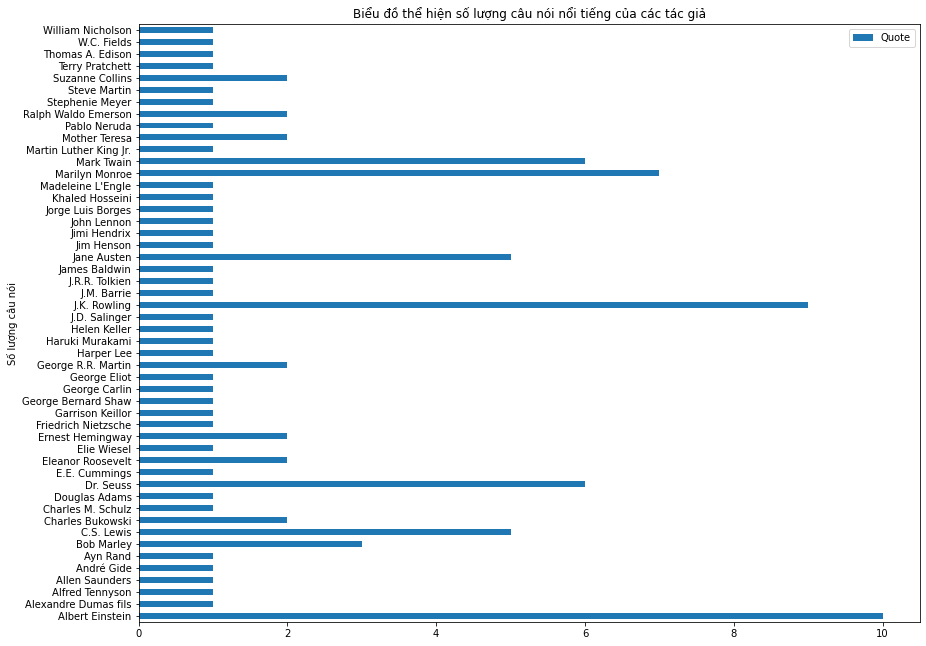

In [155]:
author_count_quote.plot.barh(xlabel = 'Số lượng câu nói',
                            ylabel = 'Tác giả',
                            title = 'Biểu đồ thể hiện số lượng câu nói nổi tiếng của các tác giả',
                            figsize=(14,11))

### 2.2.6. Phân tích, trực quan mối quan hệ giữa các tác giả với nhau,…

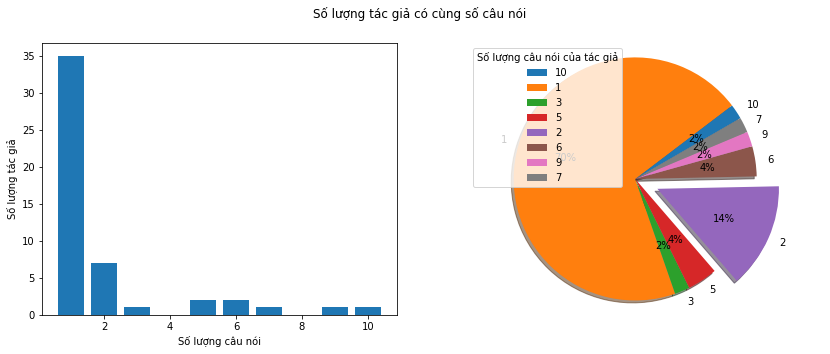

In [156]:
counter_quote =  Counter(author_count_quote['Quote'].values)
sl_cau = []
sl_tacgia = []
for i in counter_quote.keys():
    sl_cau.append(i)
    sl_tacgia.append(counter_quote[i])

plt.figure(figsize=(14,5))
# biểu đồ cột
plt.subplot(1,2,1)
plt.bar(sl_cau, sl_tacgia)
plt.xlabel('Số lượng câu nói')
plt.ylabel('Số lượng tác giả')

# biểu đồ tròn
plt.subplot(1,2,2)
explode = [0,0,0,0,0.2,0,0,0]
plt.pie(sl_tacgia, explode=explode, labels = sl_cau, shadow=True, startangle=30, autopct='%1.f%%')
plt.axis('equal')
plt.legend(title = 'Số lượng câu nói của tác giả')

plt.suptitle('Số lượng tác giả có cùng số câu nói') 
plt.show()

## 2.3. Trích xuất đặc trưng- Feature Extraction (5 điểm):

 Vì yêu cầu phân loại câu nói theo tên người nổi tiếng và tính độ tương đồng phong cách nói giữa các tác giả
nên em sẽ dùng đặc trưng là tên tác giả và câu nói của tác giả đó

In [157]:
authors = df['Tacgia'].values
quotes = df['Quote'].values

authors[:3], quotes[:3]

(array(['Albert Einstein', 'J.K. Rowling', 'Albert Einstein'], dtype=object),
 array(['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.',
        'It is our choices, Harry, that show what we truly are, far more than our abilities.',
        'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.'],
       dtype=object))

## 2.4. Suy luận (25 điểm): 

### Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù hợp?

In [158]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [159]:
quote_tokens = [nltk.word_tokenize(clean_text(quote)) for quote in quotes]

quote_ngram = []
for qtokens in quote_tokens:
    gram2 = nltk.ngrams(qtokens,2)
    join_gram = ['_'.join(list(gram)) for gram in gram2]
    quote_ngram.append(qtokens + join_gram)

print(quote_ngram[0])

['the', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'it', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', 'the_world', 'world_as', 'as_we', 'we_have', 'have_created', 'created_it', 'it_is', 'is_a', 'a_process', 'process_of', 'of_our', 'our_thinking', 'thinking_it', 'it_can', 'can_not', 'not_be', 'be_changed', 'changed_without', 'without_changing', 'changing_our', 'our_thinking']


In [160]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(quote_ngram)

In [161]:
X = tokenizer.texts_to_matrix(quote_ngram, mode='tfidf')
y = authors

X[0]

array([0.        , 0.        , 1.06014601, ..., 0.        , 0.        ,
       0.        ])

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [163]:
from sklearn.naive_bayes import MultinomialNB 

model_NB = MultinomialNB()
model_NB = model_NB.fit(X,y) 

In [164]:
from sklearn.metrics import classification_report
y_pred = model_NB.predict(X_test)
print(classification_report(y_test,y_pred)) 

                     precision    recall  f1-score   support

    Albert Einstein       1.00      1.00      1.00         3
         Bob Marley       1.00      1.00      1.00         2
          Dr. Seuss       1.00      1.00      1.00         2
        Elie Wiesel       1.00      1.00      1.00         1
   Garrison Keillor       1.00      1.00      1.00         1
 George R.R. Martin       1.00      1.00      1.00         1
       J.K. Rowling       1.00      1.00      1.00         1
        J.M. Barrie       1.00      1.00      1.00         1
        Jane Austen       1.00      1.00      1.00         2
         Jim Henson       1.00      1.00      1.00         1
        John Lennon       1.00      1.00      1.00         1
         Mark Twain       1.00      1.00      1.00         1
Ralph Waldo Emerson       1.00      1.00      1.00         1
    Stephenie Meyer       1.00      1.00      1.00         1
    Suzanne Collins       1.00      1.00      1.00         1

           accuracy   

In [165]:
def predict(quotes):
    quote_tokens = [nltk.word_tokenize(clean_text(quote)) for quote in quotes]
    quote_ngram = []
    for qtokens in quote_tokens:
        gram2 = nltk.ngrams(qtokens,2)
        join_gram = ['_'.join(list(gram)) for gram in gram2]
        quote_ngram.append(qtokens + join_gram)

    token_to_matrix = tokenizer.texts_to_matrix(quote_ngram, mode='tfidf')
    predict = model_NB.predict(token_to_matrix)
    return predict

In [166]:
quote = ['If you judge people, you have no time to love them.','There is no friend as loyal as a book.']
predict(quote)

array(['Mother Teresa', 'Ernest Hemingway'], dtype='<U22')

### Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất? (10 điểm)

In [167]:
from gensim.models import Word2Vec

In [168]:
modelw2v = Word2Vec(quote_tokens, vector_size=100, window=5)

In [169]:
def convert2vec(words):
    sum = np.array([0]*100)
    for word in words:
        if not (word in modelw2v.wv):
            continue
        vec = modelw2v.wv[word]
        sum = sum + vec
    return sum/len(words)

In [170]:
quote_vecto = []
for sent_token in quote_tokens:
    quote_vecto.append(convert2vec(sent_token))

modelw2v.wv.similar_by_word("i")

[('the', 0.7125840187072754),
 ('you', 0.6872940063476562),
 ('not', 0.602931022644043),
 ('love', 0.5996302962303162),
 ('it', 0.5940638184547424),
 ('a', 0.5903791189193726),
 ('up', 0.5861339569091797),
 ('and', 0.5848445296287537),
 ('think', 0.5734835863113403),
 ('to', 0.5690168142318726)]

In [171]:
from sklearn.metrics.pairwise import cosine_similarity
def find_similar_quote(quote):
    quote_token = nltk.word_tokenize(clean_text(quote))
    vec = convert2vec(quote_token)
    similar = cosine_similarity([vec], quote_vecto)[0]
    pred = []
    for i in range(5):
        max_similar = np.argmax(similar)
        pred.append(max_similar)
        similar[max_similar] = -1
    return pred

In [172]:
def find_similar_author(author):
    similar = []
    for quote in author_quotes[author]:
        idx = find_similar_quote(quote)
        similar += [authors[i] for i in idx if authors[i] !=  author]
    return Counter(similar)
    
print(find_similar_author('Albert Einstein'))

Counter({'Marilyn Monroe': 6, 'C.S. Lewis': 5, 'Elie Wiesel': 3, 'Bob Marley': 3, 'Jim Henson': 2, 'Mark Twain': 2, 'J.D. Salinger': 2, 'Ralph Waldo Emerson': 2, 'Harper Lee': 2, 'Ernest Hemingway': 1, 'Friedrich Nietzsche': 1, 'Khaled Hosseini': 1, 'Charles Bukowski': 1, 'Mother Teresa': 1, 'Dr. Seuss': 1, 'John Lennon': 1, 'J.K. Rowling': 1, 'Alfred Tennyson': 1, 'Jane Austen': 1, 'George R.R. Martin': 1, 'Garrison Keillor': 1})
